In [ ]:
pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 11.8 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = Path ('/content/drive/MyDrive/dataset1_Final/train')

In [ ]:
# Build the datablock
datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = RandomSplitter(valid_pct = 0.2, seed = 100), #splitter
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = datablock.dataloaders(DATASET_PATH)

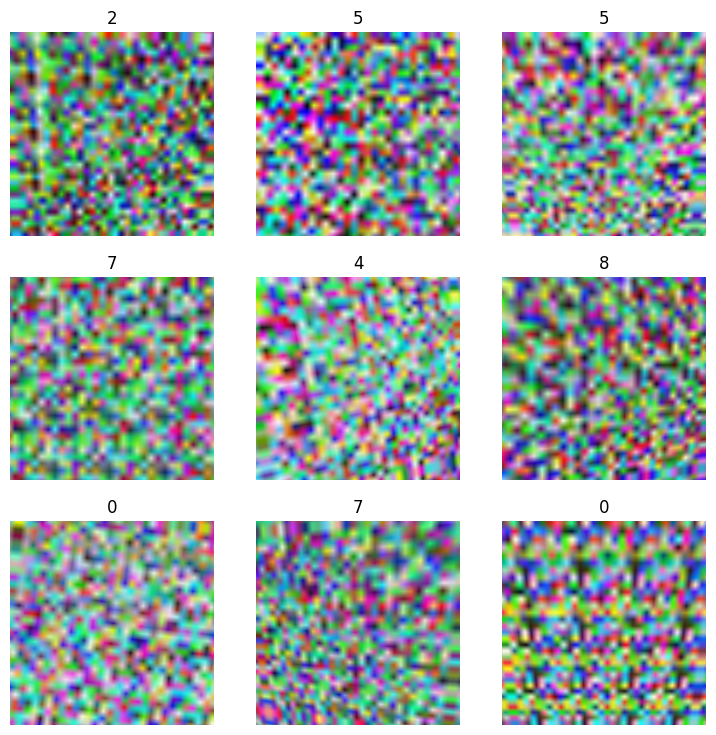

In [ ]:
dls.show_batch()

In [ ]:
def create_vit_model(pretrained=True):
    # Get ViT from timm，use 'vit_large_patch16_224' as a pretrain model
    model = timm.create_model('vit_large_patch16_224', pretrained=pretrained, num_classes=10)
    
    #num_classes = 10 
    #model.head = nn.Linear(model.classifier.in_features, num_classes)
    
    return model

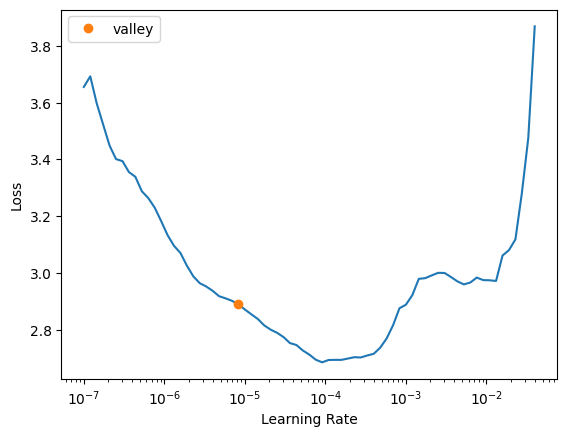

In [ ]:
#from timm.models.densenet import densenet264
vit_model = create_vit_model()
learn = Learner(dls, vit_model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
# find the best learning rate
lr_rate = learn.lr_find()

In [ ]:
# Train the model
learn.fit_one_cycle(18, lr_rate)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
# model evaluation
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.recorder.summary()

In [ ]:
learn.export('/content/drive/MyDrive/Model/ViT_data1_Final.pkl')